# Titanic Survival Prediction

#### How can I create a system to predict if a person will survive the Titanic sinking and identify key factors influencing survival like socio-economic status, age, and gender?

### Problem Statement:

The objective is to develop a predictive model that can accurately determine the likelihood of a person survivng the Titanic sinking. The primary goals are to identify key factors influencing survival and to build a robust classification model.

### Dataset:

The dataset is obtained from Kaggle, it includes information about titanic passengers, Pclass,age,gender and other features. The target variable is binary,representing whether a passenger survived or not.

### Tasks:

* Data preprocessing
* Feature scaling and splitting
* Model Building
    * Logistic Regression
    * Decision Tree
    * Random Forest
*  Evaluation

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ship=pd.read_csv(r"C:\Users\Keert\OneDrive\Desktop\pysliq\datasets\Titanic-Dataset.csv")
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
ship.shape

(891, 12)

In [4]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Preprocessing




In [5]:
#Checking for duplicates
ship.duplicated().sum()

0

In [6]:
#Dropping the unnecessary columns
ship.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)


In [7]:
#Checking for missing values
ship.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Age and Embarked columns have null values in them.

In [8]:
ship['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
ship['Age'].fillna(ship['Age'].median(),inplace=True)

In [10]:
ship['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
ship['Embarked'].fillna('S',inplace=True)

In [12]:
ship.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### EDA

#### Univariate Analysis

In [13]:

ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [14]:
col_obj=list(ship.loc[:, ship.dtypes == object].columns)
col_num=list(ship.loc[:, ship.dtypes == np.int64].columns)
col_num+=(list(ship.loc[:, ship.dtypes == np.number].columns))

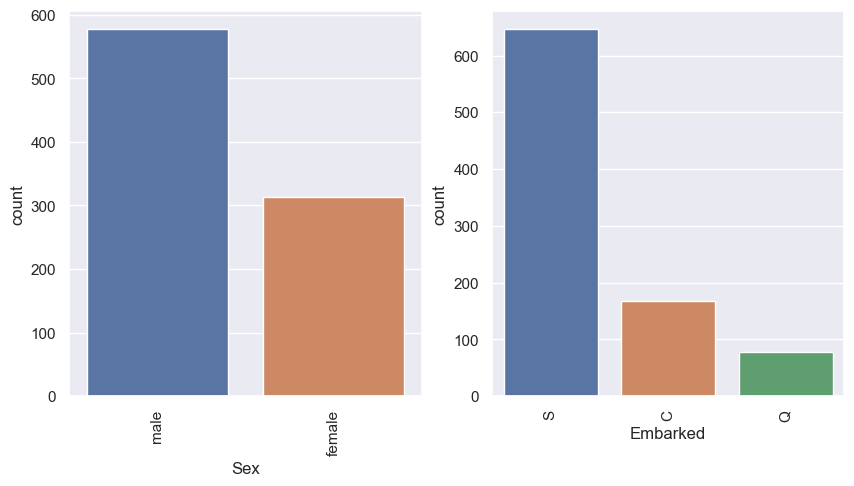

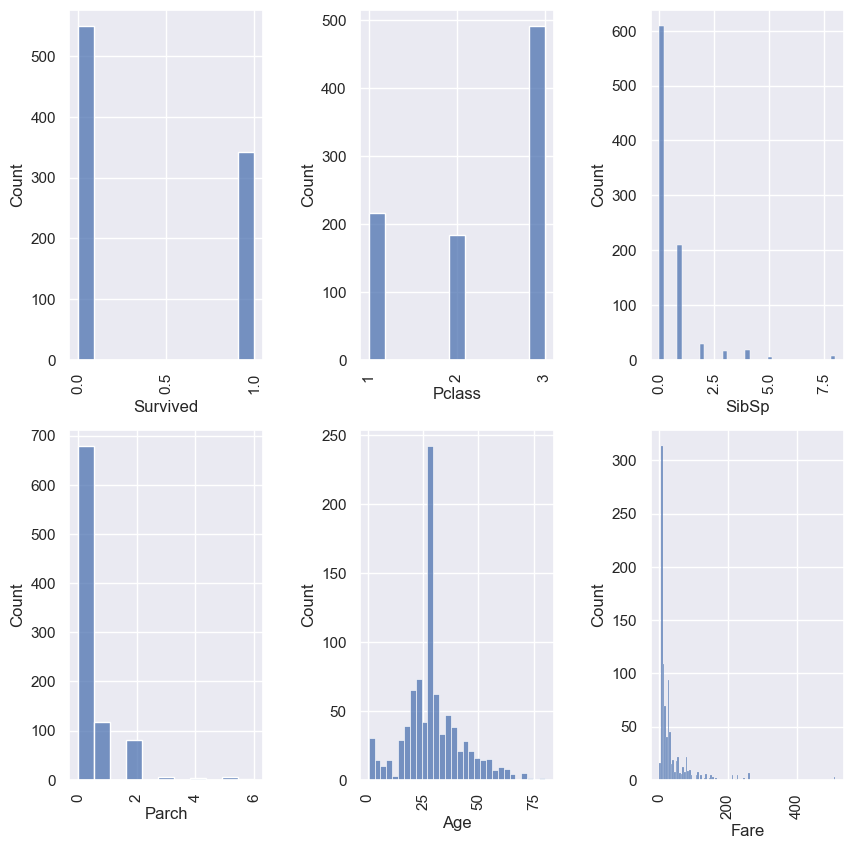

In [15]:
plt.figure(figsize=(10,5))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1 )
# Plot countplots for object columns
for i in enumerate(col_obj):
    plt.subplot(1,2, i[0]+1)
    sns.countplot(x=i[1],data=ship) 
    plt.xticks(rotation=90)
plt.show()
# Plot histograms for numerical columns
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=.5,hspace=.2)
for i in enumerate(col_num):
    plt.subplot(2,3, i[0]+1)
    sns.histplot(ship[i[1]])
    plt.xticks(rotation=90)
plt.show()

#### Bivariate Analysis

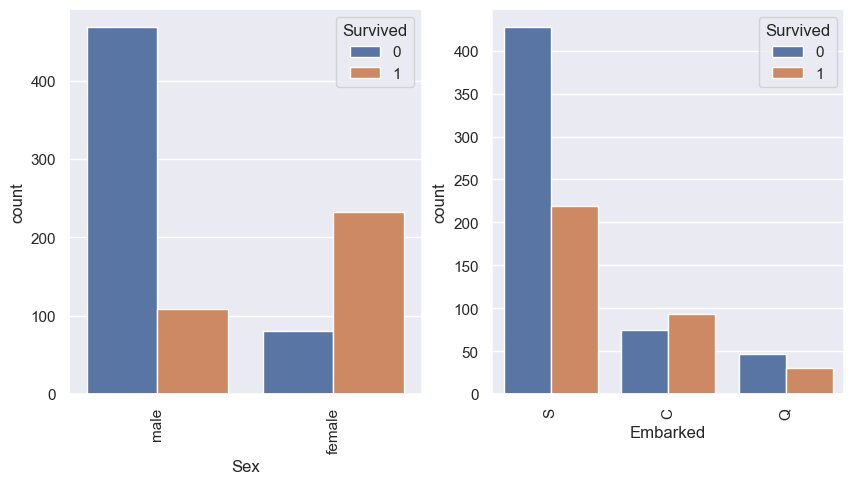

In [16]:
#PLotting categorical columns with respect to target variabe(Survived)
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=.2,hspace=0.2 )
for i in enumerate(col_obj):
    plt.subplot(1,2, i[0]+1)
    sns.countplot(x = i[1],hue = 'Survived', data = ship)
    plt.xticks(rotation=90)
plt.show()


In [17]:
# Custom mapping for 'Sex' column
ship['Sex'] = ship['Sex'].map({'male': 0, 'female': 1})

In [18]:
ship['Embarked']=ship['Embarked'].replace({'S':1,'C':2,'Q':3})


#### Multivariate Analysis

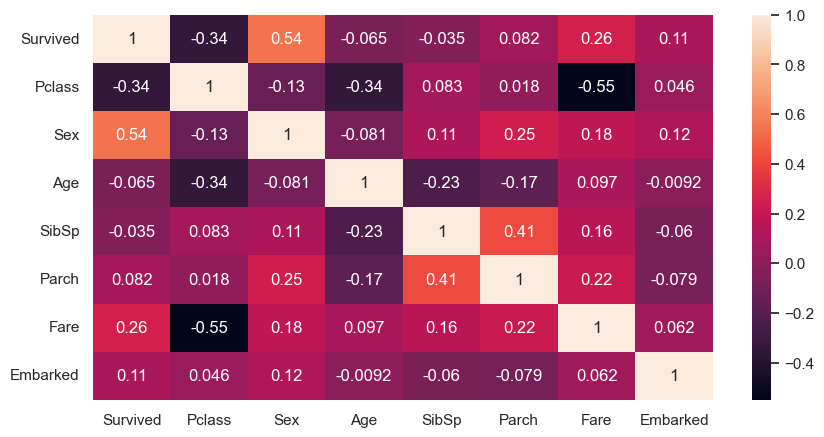

In [19]:
# To check the correlation among variables
plt.figure(figsize=(10,5))
sns.heatmap(ship.corr(numeric_only=True), annot = True)
plt.show()

### Feature Scaling and Splitting

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
#spliting data into test and train
X = ship.drop(['Survived'],axis=1)
y = ship['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [22]:
#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Building
### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
# Instantiate the logistic regression model
logistic_model = LogisticRegression()

In [25]:
# Train the logistic regression model
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [26]:
# Make predictions on the testing set
y_pred = logistic_model.predict(X_test_scaled)

In [27]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print('Classification Report:\n', classification_report(y_test, y_pred))

# Confusion Matrix
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       108
           1       0.74      0.69      0.72        71

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Confusion Matrix:
 [[91 17]
 [22 49]]


### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
# Instantiate the decision tree model
decision_tree_model = DecisionTreeClassifier()

In [30]:
# Train the model
decision_tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [31]:
# Make predictions on the testing set
y_pred_dt = decision_tree_model.predict(X_test_scaled)

In [32]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')

# Classification Report
print('Decision Tree Classification Report:\n', classification_report(y_test, y_pred_dt))

# Confusion Matrix
print('Decision Tree Confusion Matrix:\n', confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.75
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80       108
           1       0.70      0.65      0.67        71

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.75      0.75      0.75       179

Decision Tree Confusion Matrix:
 [[88 20]
 [25 46]]


### Random forest classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
# Instantiate the Random Forest model
random_forest_model = RandomForestClassifier()

In [35]:
# Train the model
random_forest_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [36]:
# Make predictions on the testing set
y_pred_rf = random_forest_model.predict(X_test_scaled)

In [37]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Classification Report
print('Random Forest Classification Report:\n', classification_report(y_test, y_pred_rf))

# Confusion Matrix
print('Random Forest Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.83
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       108
           1       0.80      0.75      0.77        71

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

Random Forest Confusion Matrix:
 [[95 13]
 [18 53]]


### Conclusion:

In summary, the Random Forest model with 83% accuracy appears to be a promising choice for predicting survival on the Titanic dataset, showcasing higher accuracy compared to Logistic Regression and Decision Tree models. 